In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [2]:
n = 15
x_i = 0
x_f = 2
sigma = 0.2

x = np.linspace(x_i,x_f,n)
y_t = 3*x + 2
y_dis = sigma*np.random.randn(n)
y = y_t + y_dis
y_err = sigma + 0.01*np.random.randn(n)
np.savetxt('recta.txt',(x,y,y_err))

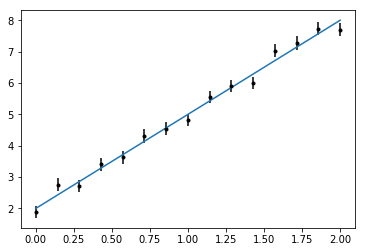

In [3]:
plt.errorbar(x,y,yerr=y_err, fmt='k.',ecolor='black')
plt.plot(x,y_t);

In [4]:
x = np.loadtxt('recta.txt')[0]
y = np.loadtxt('recta.txt')[1]
y_err = np.loadtxt('recta.txt')[2]

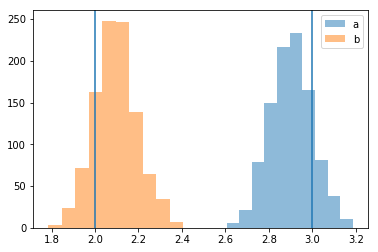

In [6]:
a0,sigma_a0= 2.9,0.1 
b0,sigma_b0 = 2.1,0.1

a_t = 3
b_t = 2

a_sample = np.random.normal(a0,sigma_a0,1000)
b_sample = np.random.normal(b0,sigma_b0,1000)

plt.hist(a_sample,alpha = 0.5, label = 'a')
plt.hist(b_sample,alpha = 0.5, label = 'b')
plt.axvline(a_t)
plt.axvline(b_t)
plt.legend();

In [66]:
#Modelo
def recta(x,a,b):
    return a*x + b

#Funcion para calcular la chi cuadrada
def chisq(theta,data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = recta(x,theta[0],theta[1])
    chisq = (y-model)**2 / y_err**2
    
    return chisq.sum()

In [32]:
chisq_ = np.zeros_like(a_sample)
for i in range(len(a_sample)):
    chisq_[i] = chisq([a_sample[i],b_sample[i]],[x,y,y_err])

In [33]:
minimo = np.where(chisq_==np.min(chisq_))[0][0]

print('a minimo es:',a_sample[minimo])
print('b minimo es:',b_sample[minimo])

a minimo es: 2.9828287601768197
b minimo es: 2.034177672309355


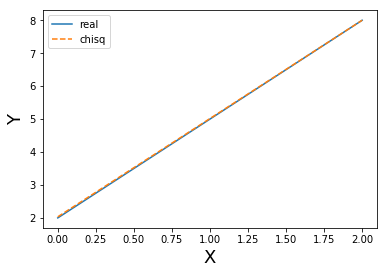

In [73]:
plt.plot(x,y_t,label = 'real')
plt.plot(x,a_sample[minimo]*x+b_sample[minimo],'--',label = 'chisq')
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.legend();

In [112]:
import random
random.randint(1,10000000)/10000000

0.0696717

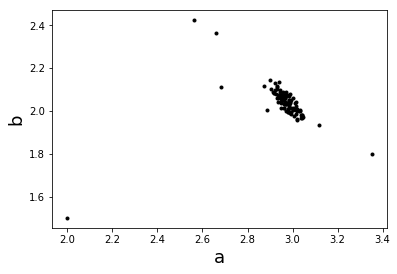

In [119]:
a_ini = 2.0
b_ini = 1.5
ch_0 = chisq([a_ini,b_ini],[x,y,y_err])

a = [a_ini]
b = [b_ini]

chisMK = []

n_a,m_a = 1. , 4.
n_b,m_b = 1. , 4

for i in range(100000): 
    a_af = np.random.uniform(n_a,m_a) 
    b_af = np.random.uniform(n_b,m_b) 
    ch = chisq([a_af,b_af],[x,y,y_err])
    if ch < ch_0:
        chisMK.append(ch)
        a.append(a_af)
        b.append(b_af)
        ch_0 = ch
    else:
        r = np.random.uniform(0,1) 
        diff = ch-ch_0
        if diff<r:
            chisMK.append(ch)
            a.append(a_af)
            b.append(b_af)
            
plt.plot(a,b,'k.')
plt.xlabel('a',fontsize=18)
plt.ylabel('b',fontsize=18);

<Figure size 432x288 with 0 Axes>

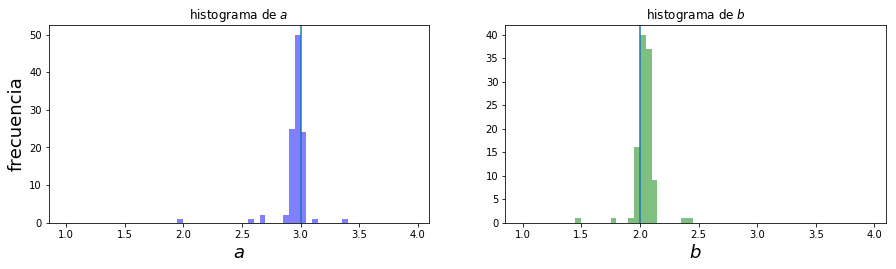

In [120]:
plt.figure(3)
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.axvline(a_t)
inter = np.arange(n_a,m_a, 0.05)
plt.hist(a, bins=inter,facecolor='blue',alpha = 0.5)
plt.title("histograma de $a$")
plt.xlabel("$a$",fontsize=18)
plt.ylabel("frecuencia",fontsize=18)

plt.subplot(222)
plt.axvline(b_t)
inter = np.arange(n_b,m_b, 0.05)
plt.hist(b, bins=inter,facecolor='g', alpha = 0.5)
plt.title("histograma de $b$")
plt.xlabel("$b$",fontsize=18)
plt.show();